**[EDA] Heatmap & Grid-scatters** <br />
可以有效的將表格型的圖進行視覺化, 常見的 Heatmap <br />
<br />
相關圖<br />
Confusion matrix (混淆矩陣)<br />
**[教學目標]**<br />
在 EDA 中, 活用各種 Heatmap<br />
**[範例重點]**<br />
Heatmap 的基礎用法 : 相關矩陣的 Heatmap (In[4], Out[4])<br />
Heatmap 的進階用法 : 散佈圖, KDE, 密度圖 (In[6], Out[6], In[7], Out[7])<br />

In [1]:
#import the modules we need
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = './data/'

In [3]:
f_app = os.path.join(data_dir,'application_train.csv')
df = pd.read_csv(f_app)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Getting the correlation between target, days_birth and few ext sources
df.DAYS_BIRTH = abs(df.DAYS_BIRTH) / 365
ext_data = df[ ['TARGET','DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'] ]
ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.078239,-0.155317,-0.160472,-0.178919
DAYS_BIRTH,-0.078239,1.000000,0.600610,0.091996,0.205478
EXT_SOURCE_1,-0.155317,0.600610,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.091996,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.205478,0.186846,0.109167,1.000000


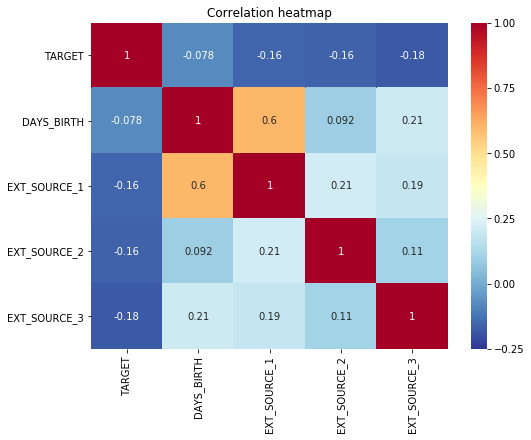

In [9]:
plt.figure(figsize = (8,6))
#Plot the heatmap of correlation coef.
sns.heatmap(ext_data_corr,cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 1 )
plt.title('Correlation heatmap')
plt.show()

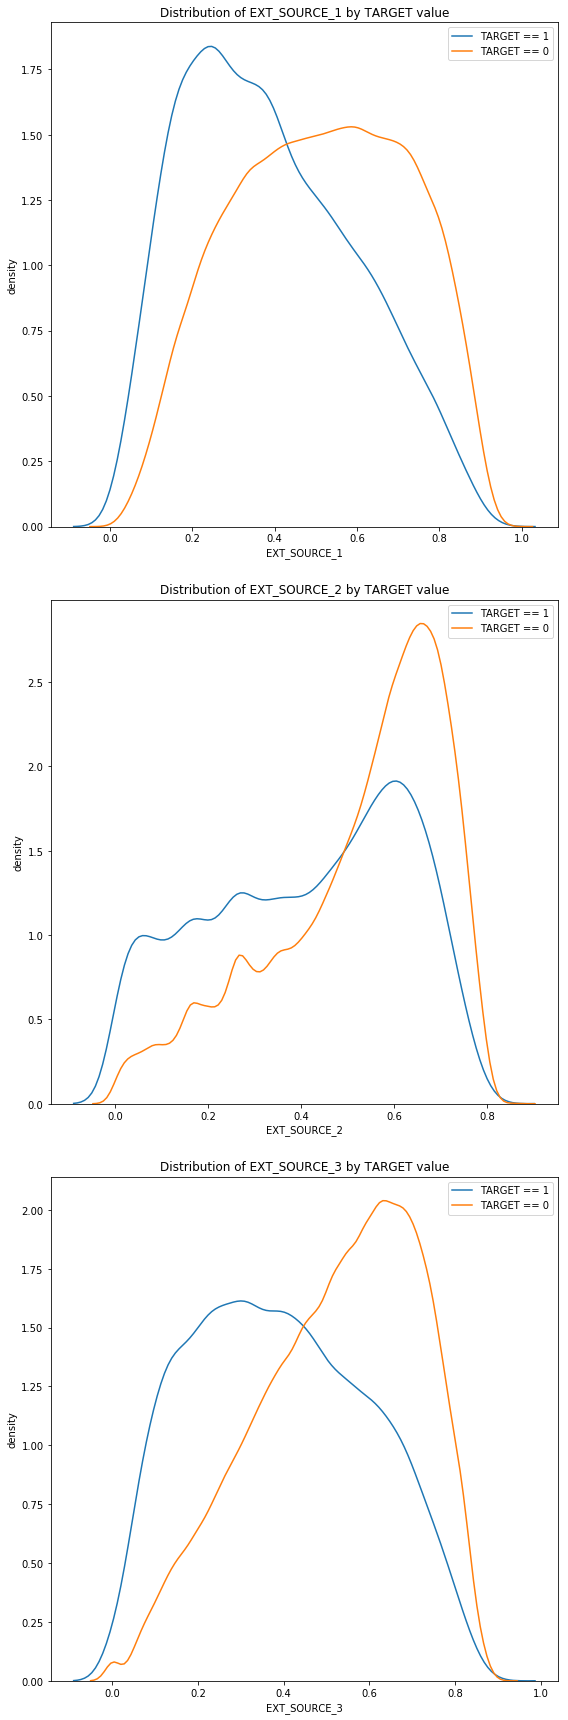

In [14]:
plt.figure(figsize = (8,24))

ext_source_cols = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
for i, col in enumerate(ext_source_cols):
    plt.subplot(3,1,i+1)
    
    #KDE plot
    sns.kdeplot(df.loc[df.TARGET == 1, col], label = 'TARGET == 1')
    sns.kdeplot(df.loc[df.TARGET == 0,col], label = 'TARGET == 0')
    plt.xlabel(col)
    plt.ylabel('density')
    plt.title('Distribution of %s by TARGET value' %col)
    
plt.tight_layout(h_pad = 2.5)

In [31]:
plot_data = ext_data.copy()#df.rename(index = str, columns = { 'DAYS_BIRTH' : 'YEARS_BIRTH'})
plot_data = plot_data.rename(index = str, columns = { 'DAYS_BIRTH' : 'YEARS_BIRTH'} )
def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    #gca means : get current axis
    #In pyplot module, there are many function which process the axes directly.
    ax = plt.gca()
    #ax.annotate will annotate some information at the coordinate xy
    ax.annotate("r = {:.2f}" .format(r), xy = (0.2,0.8), xycoords = ax.transAxes, size = 20)

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


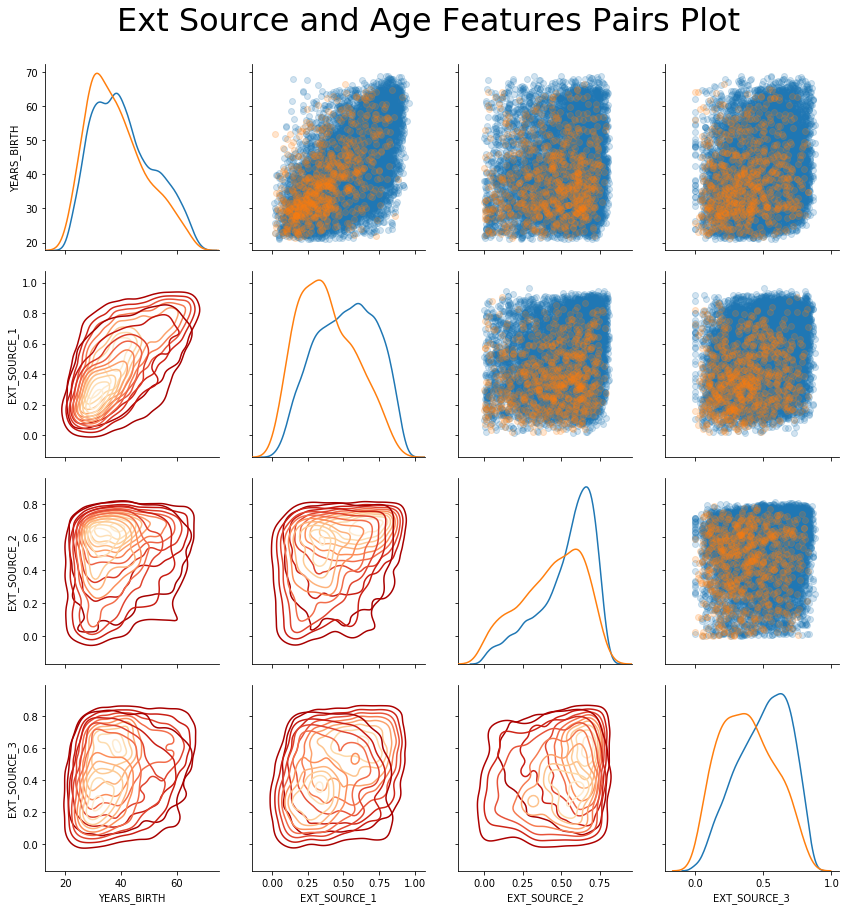

In [32]:
N_samples = 10000
#remove the NAs value and limit the data size fo 100000, because scatter plot will take a lots of time if the data is too big
plot_data = plot_data.dropna().sample(n = N_samples)
#Create pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False, hue = 'TARGET', 
                   vars = [x for x in plot_data.columns if x != 'TARGET'] )

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


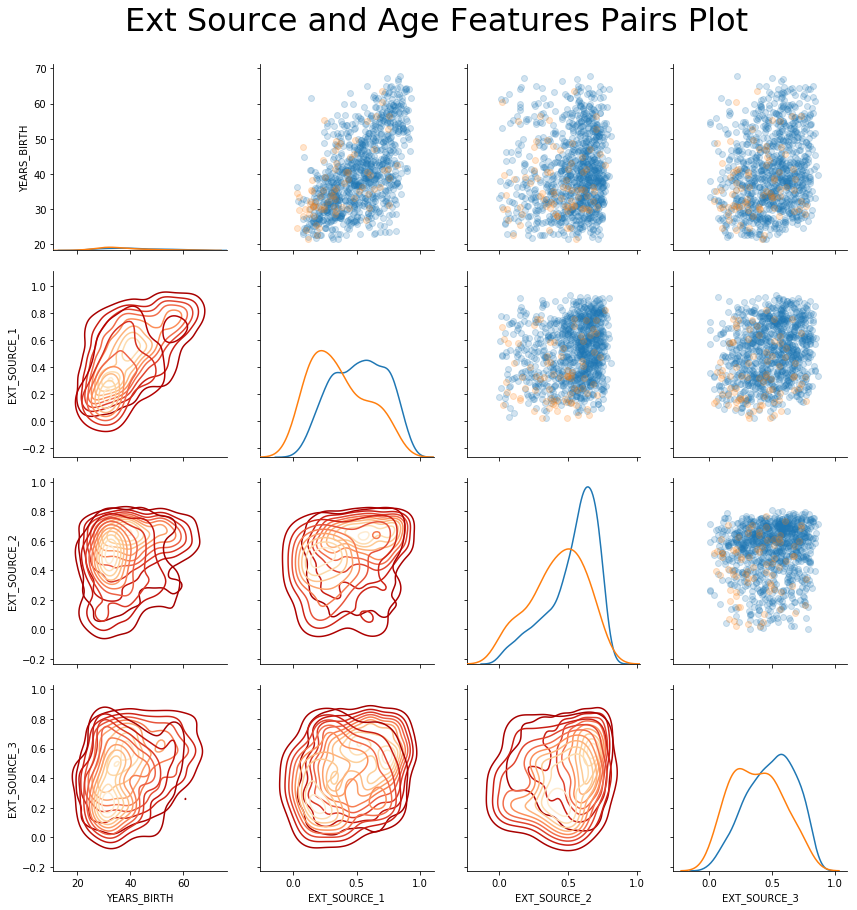

In [33]:
N_samples = 1000
#remove the NAs value and limit the data size fo 100000, because scatter plot will take a lots of time if the data is too big
plot_data = plot_data.dropna().sample(n = N_samples)
#Create pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = True, hue = 'TARGET', 
                   vars = [x for x in plot_data.columns if x != 'TARGET'] )

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

**作業** <br />
請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap <br />
請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density) <br />
請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density) <br />
<br />
<br />
**[作業目標]**<br />
試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap<br />
**[作業重點]**<br />
如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖<br />
(Hint : numpy.random.random - 均勻分布, 隨機小數)<br />
如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖<br />
(Hint : numpy.random.randn - 常態分布)

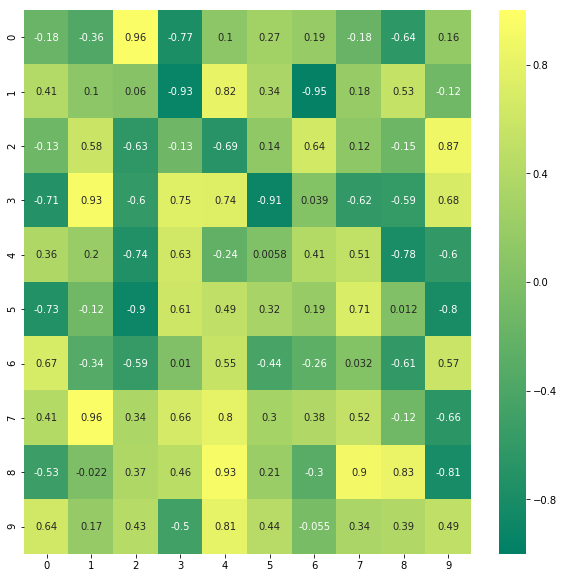

In [51]:
#請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap 
matrix = np.random.uniform(low = -1.0, high = 1.0, size = (10,10))
plt.figure(figsize=(10,10))
sns.heatmap(data1,cmap = plt.cm.summer , annot = True, vmin = -1.0, vmax = 1.0)
plt.show()

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


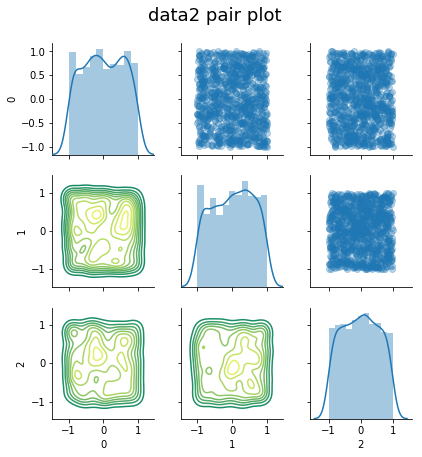

In [55]:
#請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density) 
data2 = pd.DataFrame(np.random.uniform(low = -1.0, high = 1.0, size = (1000,3)))

grid2 = sns.PairGrid(data = data2,size = 2,diag_sharey = False)
grid2.map_upper(plt.scatter,alpha = 0.3)
grid2.map_diag(sns.distplot)
grid2.map_lower(sns.kdeplot, cmap = plt.cm.summer)

plt.suptitle('data2 pair plot', size = 18, y=1.05)
plt.show()

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

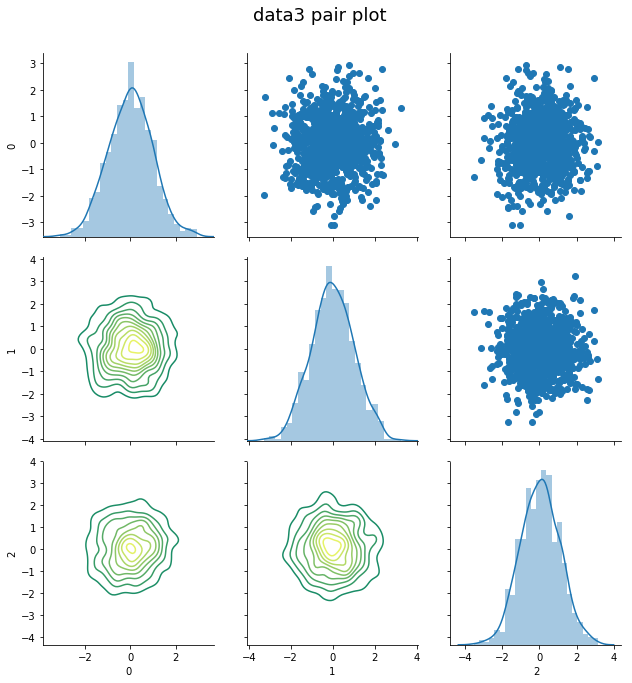

In [59]:
#請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density) 
data3 = np.random.normal(size = (1000,3))
data3 = pd.DataFrame(data3)

plt.figure(figsize=(10,10))
grid3 = sns.PairGrid(data3,size = 3,diag_sharey = False)
grid3.map_upper(plt.scatter)
grid3.map_diag(sns.distplot)
grid3.map_lower(sns.kdeplot,cmap = plt.cm.summer)

plt.suptitle('data3 pair plot', size = 18, y=1.05)
plt.show()

**Some reference** <br />
heatmap color in matplotlib.pyplot.cm <br />
https://matplotlib.org/tutorials/colors/colormaps.html